<a href="https://colab.research.google.com/github/mblackstock/notebooks/blob/main/notebooks/Baby_Names.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Baby names demo

In this notebook we analyze the Baby Names data provided by the the US Government to look at some interesting things about kids names.

First, lets get the baby names data.  You can find it yourself at https://www.ssa.gov/oact/babynames/limits.html

I've stored it in my github repository at mblackstock/datasets

In [13]:
# !git clone https://github.com/mblackstock/datasets.git
# !ls

Let's load up one of the files and have a look at it:

In [14]:
import pandas as pd
names1880 = pd.read_csv('../datasets/names/yob1880.txt', names=['name','sex','births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


We can manipulate the data by summing up the number of births by sex:

In [15]:
names1880.groupby('sex').births.sum()

sex
F     90994
M    110490
Name: births, dtype: int64

In this data set, all of the birth data is split up by year, so if we want to analyse all of the data together, we can load them all up using a for loop.

In [16]:
years = range(1880, 2019)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
  path = '../datasets/names/yob%d.txt' % year
  frame = pd.read_csv(path, names=columns)
  frame['year'] = year    # add a new column to the data frame
  pieces.append(frame)


Then we concatenate all of the pieces to make one big data frame

In [17]:
# now concatenate all of the pieces together into one big data frame
names = pd.concat(pieces, ignore_index=True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1957442,Zylas,M,5,2018
1957443,Zyran,M,5,2018
1957444,Zyrie,M,5,2018
1957445,Zyron,M,5,2018


Now say that we wanted to use this data to see how many babies were born in each year by sex.  We can use the pivot_table function to sum up the number of births by year like this:

In [18]:
total_births = names.pivot_table('births', index='year',columns='sex', aggfunc=sum)
total_births

sex,F,M
year,,
1880,90994,110490
1881,91953,100743
1882,107847,113686
1883,112319,104625
1884,129019,114442
...,...,...
2014,1783445,1917773
2015,1781725,1913059
2016,1767902,1893471


Now we have a `DataFrame` where the index is year, and the columns are the number of male and female births.

Lets plot this data!

<AxesSubplot:title={'center':'Total births by sex and year'}, xlabel='year'>

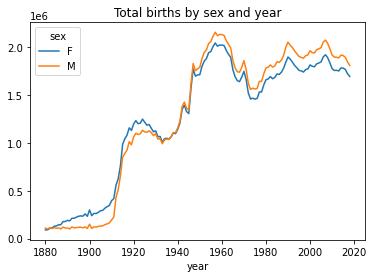

In [19]:
total_births.plot(title='Total births by sex and year')

This is a typical flow for doing data analysis.  The first thing we do is find the data.  Then we use the pandas library to load it, manipulate the data and do some basic visualizations.